<a href="https://colab.research.google.com/github/alanfuentes92/business_analytics/blob/main/Fuentes_Alan-Comisi%C3%B3n_25262-TPI_Data_Analytics-Entrega_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Etapa 1: Recopilación y Preparación de Datos
---

Objetivo:
- Descargar datasets.
- Cargar datos en DataFrames utilizando Pandas.
- Normalizar tipos de datos (númericos y fechas).
- Realizar un análisis exploratorio inicial para comprender la estructura de los datos.

In [49]:
# ------------------------------------------------------------
# 0. Instalación e importación de librerías
# ------------------------------------------------------------
# gdown   : descarga de archivos
# chardet : detección de encoding
# pandas  : manipulación y análisis de datos
# pathlib : manejo de rutas
# ------------------------------------------------------------

!pip -q install gdown chardet

import pandas as pd
import gdown
import chardet
from pathlib import Path

In [50]:
# ------------------------------------------------------------
# 1A. Configuración de fuentes de datos
# ------------------------------------------------------------
# Se definen los IDs de Google Drive para cada dataset.
# ------------------------------------------------------------

FILE_IDS = {
    "marketing": "12_np9bVbvdDlFzK0ZXnVq9NrDpuAYgwq",
    "clientes":  "1Uc9hgxYNBDLsrWHySXsLMezu4XBRMdBc",
    "ventas":    "14Vfco81mMzXZgnr38u4AprnM4vVryBeH",
}


# ------------------------------------------------------------
# 1B. Estructura de directorios
# ------------------------------------------------------------
# raw  : archivos originales descargados
# utf8 : archivos normalizados a UTF-8
# ------------------------------------------------------------

DATA_DIR = Path("/content/data")
RAW_DIR  = DATA_DIR / "raw"
UTF8_DIR = DATA_DIR / "utf8"

RAW_DIR.mkdir(parents=True, exist_ok=True)
UTF8_DIR.mkdir(parents=True, exist_ok=True)


# ------------------------------------------------------------
# 1C. Funciones
# ------------------------------------------------------------

def download_csv(file_id: str, output_path: Path):
    """
    Descarga un archivo CSV desde Google Drive.
    Valida que el archivo exista y no esté vacío.
    """
    url = f"https://drive.google.com/uc?id={file_id}"
    gdown.download(url=url, output=str(output_path), quiet=False)

    if not output_path.exists() or output_path.stat().st_size == 0:
        raise RuntimeError(f"Descarga fallida o archivo vacío: {output_path.name}")


def detect_encoding(file_path: Path) -> str:
    """
    Detecta el encoding del archivo.
    """
    with open(file_path, "rb") as f:
        result = chardet.detect(f.read())
    return result["encoding"] or "utf-8"


def load_and_normalize_to_utf8(raw_path: Path, utf8_path: Path) -> pd.DataFrame:
    """
    Carga un CSV usando su encoding real y lo re-exporta
    normalizado a UTF-8 para uso consistente en el análisis.
    """
    encoding = detect_encoding(raw_path)
    print(f"{raw_path.name} | encoding detectado: {encoding}\n")

    df = pd.read_csv(raw_path, encoding=encoding)
    df.to_csv(utf8_path, index=False, encoding="utf-8")
    return df


# ------------------------------------------------------------
# 1D. Descarga, carga y normalización de datasets
# ------------------------------------------------------------
# Se ejecuta:
# - descarga
# - detección de encoding
# - carga a DataFrame
# - normalización a UTF-8
# ------------------------------------------------------------

dfs = {}

for name, fid in FILE_IDS.items():
    raw_file  = RAW_DIR / f"{name}.csv"
    utf8_file = UTF8_DIR / f"{name}.csv"

    download_csv(fid, raw_file)
    dfs[name] = load_and_normalize_to_utf8(raw_file, utf8_file)


# Asignación explícita de DataFrames
df_marketing = dfs["marketing"]
df_clientes  = dfs["clientes"]
df_ventas    = dfs["ventas"]


# ------------------------------------------------------------
# 1E. Verificación de estructura
# ------------------------------------------------------------
# Se valida tamaño, columnas y una muestra inicial.
# ------------------------------------------------------------

print("marketing:", df_marketing.shape, df_marketing.columns.tolist())
print("clientes :", df_clientes.shape,  df_clientes.columns.tolist())
print("ventas   :", df_ventas.shape,    df_ventas.columns.tolist())

print("\n")
display(df_marketing.head(3))
print("\n")
display(df_clientes.head(3))
print("\n")
display(df_ventas.head(3))

Downloading...
From: https://drive.google.com/uc?id=12_np9bVbvdDlFzK0ZXnVq9NrDpuAYgwq
To: /content/data/raw/marketing.csv
100%|██████████| 4.46k/4.46k [00:00<00:00, 11.5MB/s]


marketing.csv | encoding detectado: utf-8



Downloading...
From: https://drive.google.com/uc?id=1Uc9hgxYNBDLsrWHySXsLMezu4XBRMdBc
To: /content/data/raw/clientes.csv
100%|██████████| 24.2k/24.2k [00:00<00:00, 40.7MB/s]


clientes.csv | encoding detectado: utf-8



Downloading...
From: https://drive.google.com/uc?id=14Vfco81mMzXZgnr38u4AprnM4vVryBeH
To: /content/data/raw/ventas.csv
100%|██████████| 166k/166k [00:00<00:00, 45.1MB/s]

ventas.csv | encoding detectado: utf-8

marketing: (90, 6) ['id_campanha', 'producto', 'canal', 'costo', 'fecha_inicio', 'fecha_fin']
clientes : (567, 5) ['id_cliente', 'nombre', 'edad', 'ciudad', 'ingresos']
ventas   : (3035, 6) ['id_venta', 'producto', 'precio', 'cantidad', 'fecha_venta', 'categoria']




,id_campanha,producto,canal,costo,fecha_inicio,fecha_fin
0,74,Adorno de pared,TV,4.81,20/03/2024,03/05/2024
1,12,Tablet,RRSS,3.40,26/03/2024,13/05/2024
2,32,Lámpara de mesa,Email,5.54,28/03/2024,20/04/2024


,id_cliente,nombre,edad,ciudad,ingresos
0,1,Aloysia Screase,44,Mar del Plata,42294.68
1,2,Kristina Scaplehorn,25,Posadas,24735.04
2,3,Filip Castagne,50,Resistencia,35744.85


,id_venta,producto,precio,cantidad,fecha_venta,categoria
0,792,Cuadro decorativo,$69.94,5.0,02/01/2024,Decoración
1,811,Lámpara de mesa,$105.10,5.0,02/01/2024,Decoración
2,1156,Secadora,$97.96,3.0,02/01/2024,Electrodomésticos


In [51]:
# ------------------------------------------------------------
# 2A. Normalización de columnas numéricas y fechas
# ------------------------------------------------------------
# Se transforman strings numéricos a tipos adecuados
# y se parsean fechas para permitir cálculos temporales.
# ------------------------------------------------------------

import re

def normalize_number(x):
    """
    Convierte valores numéricos expresados como string
    a float. Maneja separadores de miles y decimales.
    """
    if pd.isna(x):
        return pd.NA

    s = str(x).strip()
    s = re.sub(r"[^\d,.\-]", "", s)

    if s in ("", ".", ",", "-", "+", "--"):
        return pd.NA

    if "," in s and "." in s:
        if s.rfind(",") > s.rfind("."):
            s = s.replace(".", "").replace(",", ".")
        else:
            s = s.replace(",", "")
    else:
        if "," in s:
            s = s.replace(",", ".")

    try:
        return float(s)
    except:
        return pd.NA


# Conversión de tipos
df_ventas["precio"]   = df_ventas["precio"].apply(normalize_number).astype("Float64")
df_ventas["cantidad"] = df_ventas["cantidad"].apply(normalize_number).round(0).astype("Int64")
df_ventas["fecha_venta"] = pd.to_datetime(df_ventas["fecha_venta"], errors="coerce")

# ------------------------------------------------------------
# 2B. Cálculo de ventas mensuales
# ------------------------------------------------------------
# Se calcula el total por registro y luego se agregan
# las ventas a nivel mensual.
# ------------------------------------------------------------

df_ventas["total"] = df_ventas["precio"] * df_ventas["cantidad"]

df_ventas_clean = df_ventas.dropna(subset=["total", "fecha_venta"]).copy()

ventas_mensuales = (
    df_ventas_clean
    .assign(Mes=df_ventas_clean["fecha_venta"].dt.to_period("M").astype(str))
    .groupby("Mes", as_index=False)["total"]
    .sum()
    .rename(columns={"total": "Total_Ventas"})
)

display(ventas_mensuales)

,Mes,Total_Ventas
0,2024-01,35813.42
1,2024-02,62419.5
2,2024-03,41350.64
3,2024-04,40841.22
4,2024-05,49496.33
5,2024-06,50875.32
6,2024-07,58644.45
7,2024-08,52239.92
8,2024-09,42206.39
9,2024-10,49905.12


In [52]:
# ------------------------------------------------------------
# 3A. Estructuras de datos (listas y diccionarios)
# ------------------------------------------------------------
# Ejemplo simple para ilustrar el uso de diccionarios
# y listas antes de trabajar con DataFrames.
# ------------------------------------------------------------

ventas_ejemplo = [
    {"producto": "Tarjeta de Crédito", "precio": 48727.53, "cantidad": 2},
    {"producto": "Cuenta Corriente",   "precio": 19752.26, "cantidad": 5},
    {"producto": "Préstamo Personal",  "precio": 247324.32, "cantidad": 1},
]

for v in ventas_ejemplo:
    v["total"] = v["precio"] * v["cantidad"]

df_ventas_ejemplo = pd.DataFrame(ventas_ejemplo)
display(df_ventas_ejemplo)

,producto,precio,cantidad,total
0,Tarjeta de Crédito,48727.53,2,97455.06
1,Cuenta Corriente,19752.26,5,98761.30
2,Préstamo Personal,247324.32,1,247324.32


In [53]:
# ------------------------------------------------------------
# 4A. Análisis exploratorio inicial (EDA)
# ------------------------------------------------------------

def eda_basico(nombre, df):
    print(f"\n=== {nombre.upper()} ===")
    print("Shape:", df.shape)
    print("\nTipos de datos:")
    print(df.dtypes)
    print("\nEstadísticas descriptivas:")
    display(df.describe(include="number"))
    print("\nPrimeras filas:")
    display(df.head())

eda_basico("marketing", df_marketing)
eda_basico("clientes",  df_clientes)
eda_basico("ventas",    df_ventas)


=== MARKETING ===
Shape: (90, 6)

Tipos de datos:
id_campanha       int64
producto         object
canal            object
costo           float64
fecha_inicio     object
fecha_fin        object
dtype: object

Estadísticas descriptivas:


,id_campanha,costo
count,90.000000,90.000000
mean,45.500000,4.928667
std,26.124701,0.947750
min,1.000000,2.950000
25%,23.250000,4.372500
50%,45.500000,4.900000
75%,67.750000,5.562500
max,90.000000,7.390000



Primeras filas:


,id_campanha,producto,canal,costo,fecha_inicio,fecha_fin
0,74,Adorno de pared,TV,4.81,20/03/2024,03/05/2024
1,12,Tablet,RRSS,3.40,26/03/2024,13/05/2024
2,32,Lámpara de mesa,Email,5.54,28/03/2024,20/04/2024
3,21,Smartphone,RRSS,6.37,29/03/2024,16/05/2024
4,58,Alfombra,Email,4.25,31/03/2024,05/05/2024



=== CLIENTES ===
Shape: (567, 5)

Tipos de datos:
id_cliente      int64
nombre         object
edad            int64
ciudad         object
ingresos      float64
dtype: object

Estadísticas descriptivas:


,id_cliente,edad,ingresos
count,567.000000,567.000000,567.000000
mean,284.000000,37.940035,34668.739012
std,163.823075,10.202885,12974.531446
min,1.000000,20.000000,170.290000
25%,142.500000,30.000000,26015.240000
50%,284.000000,37.000000,35066.830000
75%,425.500000,43.000000,42457.100000
max,567.000000,81.000000,88053.010000



Primeras filas:


,id_cliente,nombre,edad,ciudad,ingresos
0,1,Aloysia Screase,44,Mar del Plata,42294.68
1,2,Kristina Scaplehorn,25,Posadas,24735.04
2,3,Filip Castagne,50,Resistencia,35744.85
3,4,Liuka Luard,39,Bahía Blanca,27647.96
4,5,Dore Cockshtt,28,Rosario,28245.65



=== VENTAS ===
Shape: (3035, 7)

Tipos de datos:
id_venta                int64
producto               object
precio                Float64
cantidad                Int64
fecha_venta    datetime64[ns]
categoria              object
total                 Float64
dtype: object

Estadísticas descriptivas:


,id_venta,precio,cantidad,total
count,3035.000000,3033.0,3033.0,3033.0
mean,1499.851400,75.289034,6.496538,488.968985
std,866.465379,28.734666,3.45725,334.594511
min,1.000000,26.0,1.0,26.3
25%,748.500000,50.02,3.0,220.5
50%,1502.000000,75.27,7.0,418.05
75%,2249.500000,100.04,9.0,708.89
max,3000.000000,124.97,12.0,1488.12



Primeras filas:


,id_venta,producto,precio,cantidad,fecha_venta,categoria,total
0,792,Cuadro decorativo,69.94,5,2024-02-01,Decoración,349.7
1,811,Lámpara de mesa,105.1,5,2024-02-01,Decoración,525.5
2,1156,Secadora,97.96,3,2024-02-01,Electrodomésticos,293.88
3,1372,Heladera,114.35,8,2024-02-01,Electrodomésticos,914.8
4,1546,Secadora,106.21,4,2024-02-01,Electrodomésticos,424.84


In [54]:
# ------------------------------------------------------------
# 5A. Calidad de datos
# ------------------------------------------------------------
# Identificación de valores nulos, duplicados y
# revisión de columnas clave.
# ------------------------------------------------------------

def reporte_calidad(nombre, df):
    print(f"\n=== Calidad de Datos: {nombre.upper()} ===")
    display(df.isnull().sum().to_frame("n_nulos"))
    print("\nDuplicados:", int(df.duplicated().sum()))

reporte_calidad("marketing", df_marketing)
reporte_calidad("clientes",  df_clientes)
reporte_calidad("ventas",    df_ventas)


=== Calidad de Datos: MARKETING ===


,n_nulos
id_campanha,0
producto,0
canal,0
costo,0
fecha_inicio,0
fecha_fin,0



Duplicados: 0

=== Calidad de Datos: CLIENTES ===


,n_nulos
id_cliente,0
nombre,0
edad,0
ciudad,0
ingresos,0



Duplicados: 0

=== Calidad de Datos: VENTAS ===


,n_nulos
id_venta,0
producto,0
precio,2
cantidad,2
fecha_venta,1846
categoria,0
total,2



Duplicados: 35


# Etapa 2: Preprocesamiento y Limpieza de Datos
---

Objetivo:
- Limpiar los conjuntos de datos eliminando duplicados y caracteres no deseados.
- Transformar los datos para generar nuevas variables.
- Agregar la información para analizar el desempeño por producto y categoría.
- Integrar los datasets de ventas y marketing para obtener una visión unificada.

In [55]:
# ------------------------------------------------------------
# 1A. Eliminación de duplicados
# ------------------------------------------------------------
# Se identifican y eliminan registros duplicados.
# ------------------------------------------------------------

df_ventas_limpio = df_ventas.copy()

filas_iniciales = len(df_ventas_limpio)
duplicados_iniciales = df_ventas_limpio.duplicated().sum()

df_ventas_limpio = df_ventas_limpio.drop_duplicates()

filas_finales = len(df_ventas_limpio)
duplicados_finales = df_ventas_limpio.duplicated().sum()

# ------------------------------------------------------------
# 1B. Limpieza de texto
# ------------------------------------------------------------
# Se eliminan espacios innecesarios y caracteres especiales.
# ------------------------------------------------------------

def clean_text(s):
    if isinstance(s, str):
        s = s.strip()
        s = s.replace("\n", " ").replace("\t", " ")
        return s
    return s

for df in [df_marketing, df_clientes, df_ventas_limpio]:
    for col in df.select_dtypes(include="object").columns:
        df[col] = df[col].apply(clean_text)

# Eliminación de caracteres no alfanuméricos en columnas clave
df_ventas_limpio["producto"] = df_ventas_limpio["producto"].str.replace(
    r"[^A-Za-z0-9áéíóúÁÉÍÓÚñÑ\s]", "", regex=True
)

df_ventas_limpio["categoria"] = df_ventas_limpio["categoria"].str.replace(
    r"[^A-Za-z0-9áéíóúÁÉÍÓÚñÑ\s]", "", regex=True
)

# Resultado
print("=== Resultados Limpieza de Duplicados ===\n")
print(f"Filas iniciales        : {filas_iniciales}")
print(f"Duplicados detectados  : {duplicados_iniciales}")
print(f"Duplicados eliminados  : {duplicados_iniciales - duplicados_finales}")
print(f"Filas finales en ventas: {filas_finales}\n")

print("Resultado de la limpieza de duplicados en ventas:\n")
display(df_ventas_limpio.head(5))


=== Resultados Limpieza de Duplicados ===

Filas iniciales        : 3035
Duplicados detectados  : 35
Duplicados eliminados  : 35
Filas finales en ventas: 3000

Resultado de la limpieza de duplicados en ventas:



,id_venta,producto,precio,cantidad,fecha_venta,categoria,total
0,792,Cuadro decorativo,69.94,5,2024-02-01,Decoración,349.7
1,811,Lámpara de mesa,105.1,5,2024-02-01,Decoración,525.5
2,1156,Secadora,97.96,3,2024-02-01,Electrodomésticos,293.88
3,1372,Heladera,114.35,8,2024-02-01,Electrodomésticos,914.8
4,1546,Secadora,106.21,4,2024-02-01,Electrodomésticos,424.84


In [56]:
# ------------------------------------------------------------
# 2A. Transformación de Datos: Cálculo del total por venta
# ------------------------------------------------------------
# Se crea una nueva variable que representa el ingreso
# generado por cada venta.
# ------------------------------------------------------------

# Total por venta
df_ventas_limpio["total"] = (
    df_ventas_limpio["precio"] * df_ventas_limpio["cantidad"]
)

# ------------------------------------------------------------
# 2A. Identificación de productos de alto rendimiento
# ------------------------------------------------------------
# Se consideran productos con ingresos en el percentil 80
# o superior.
# ------------------------------------------------------------

# Rendimiento por producto
rendimiento_producto = (
    df_ventas_limpio
    .groupby("producto")["total"]
    .sum()
    .sort_values(ascending=False)
    .reset_index()
)

umbral_top = rendimiento_producto["total"].quantile(0.80)

productos_top = rendimiento_producto[
    rendimiento_producto["total"] >= umbral_top
]["producto"]

df_ventas_top = df_ventas_limpio[
    df_ventas_limpio["producto"].isin(productos_top)
].copy()

print(f"Productos de alto rendimiento: {len(productos_top)}")
print("\nVentas correspondientes a productos de alto rendimiento:\n")
display(rendimiento_producto.head(10))
print("\nTop 5 Ventas:\n")
display(df_ventas_top.head(5))


Productos de alto rendimiento: 6

Ventas correspondientes a productos de alto rendimiento:



,producto,total
0,Lámpara de mesa,82276.38
1,Auriculares,74175.58
2,Microondas,72562.89
3,Cafetera,59607.31
4,Cuadro decorativo,54297.6
5,Smartphone,54132.44
6,Secadora,52115.45
7,Jarrón decorativo,51130.88
8,Batidora,50979.2
9,Rincón de plantas,50456.45



Top 5 Ventas:



,id_venta,producto,precio,cantidad,fecha_venta,categoria,total
0,792,Cuadro decorativo,69.94,5,2024-02-01,Decoración,349.7
1,811,Lámpara de mesa,105.1,5,2024-02-01,Decoración,525.5
19,882,Cuadro decorativo,101.92,9,2024-04-01,Decoración,917.28
28,2155,Auriculares,84.8,10,2024-05-01,Electrónica,848.0
31,1572,Cafetera,61.4,9,2024-06-01,Electrodomésticos,552.6


Resumen de ingresos por categoría:


,categoria,ingresos_totales,ventas_totales,promedio_venta
0,Electrodomésticos,505299.63,1000,505.29963
1,Electrónica,482577.8,999,483.54489
2,Decoración,479216.09,1001,479.21609


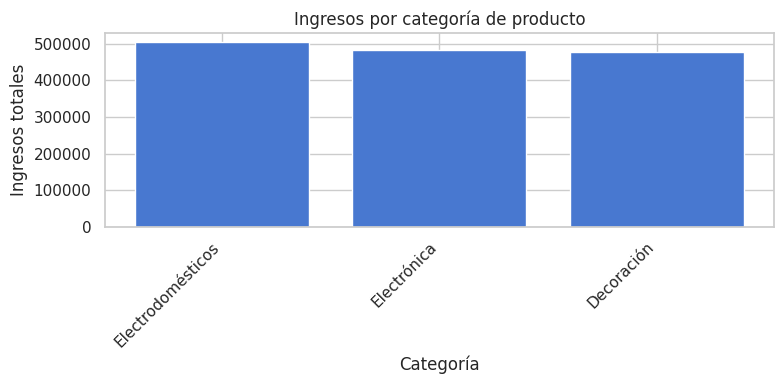

In [57]:
# ------------------------------------------------------------
# 3A. Agregación por categoría de producto
# ------------------------------------------------------------
# Se analizan ingresos totales, cantidad de ventas
# y ticket promedio por categoría.
# ------------------------------------------------------------

df_ventas_limpio["categoria"] = df_ventas_limpio["categoria"].fillna("Sin categoría")

resumen_categoria = (
    df_ventas_limpio
    .groupby("categoria")
    .agg(
        ingresos_totales=("total", "sum"),
        ventas_totales=("id_venta", "count"),
        promedio_venta=("total", "mean")
    )
    .sort_values("ingresos_totales", ascending=False)
    .reset_index()
)

print("Resumen de ingresos por categoría:")
display(resumen_categoria)

print("\n\n")

# ------------------------------------------------------------
# 3B. Visualización de ingresos por categoría
# ------------------------------------------------------------

# Gráfico de barras
import matplotlib.pyplot as plt

plt.figure(figsize=(8,4))
plt.bar(resumen_categoria["categoria"], resumen_categoria["ingresos_totales"])
plt.title("Ingresos por categoría de producto")
plt.xlabel("Categoría")
plt.ylabel("Ingresos totales")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


In [58]:
# ------------------------------------------------------------
# 4A. Integración de datos
# ------------------------------------------------------------
# Se combinan ventas y marketing para analizar el impacto de
# los canales en los ingresos. La integración se realiza por
# 'producto'.
# ------------------------------------------------------------

ventas_base = df_ventas_limpio[
    ["producto", "fecha_venta", "categoria", "total"]
].copy()

marketing_base = df_marketing[
    ["producto", "canal", "costo", "fecha_inicio", "fecha_fin"]
].copy()

# Conversión de fechas
marketing_base["fecha_inicio"] = pd.to_datetime(marketing_base["fecha_inicio"], errors="coerce", dayfirst=True)
marketing_base["fecha_fin"]    = pd.to_datetime(marketing_base["fecha_fin"], errors="coerce", dayfirst=True)

df_integrado = pd.merge(
    ventas_base,
    marketing_base,
    on="producto",
    how="left"
)

print("Filas integradas:", len(df_integrado))
print(
    "Nota: el incremento de filas se debe a múltiples campañas "
    "asociadas a un mismo producto."
)

print("\nVista integrada (primeras 10 filas): Ventas + Marketing\n")
display(df_integrado.head(10))

# ------------------------------------------------------------
# 4B. Análisis de ingresos por canal de marketing
# ------------------------------------------------------------

ingresos_por_canal = (
    df_integrado
    .groupby("canal")["total"]
    .sum()
    .sort_values(ascending=False)
    .reset_index()
)

print("\nIngresos totales por canal de marketing\n")
display(ingresos_por_canal)

Filas integradas: 9000
Nota: el incremento de filas se debe a múltiples campañas asociadas a un mismo producto.

Vista integrada (primeras 10 filas): Ventas + Marketing



,producto,fecha_venta,categoria,total,canal,costo,fecha_inicio,fecha_fin
0,Cuadro decorativo,2024-02-01,Decoración,349.7,RRSS,5.27,2024-04-27,2024-06-04
1,Cuadro decorativo,2024-02-01,Decoración,349.7,Email,5.28,2024-08-15,2024-09-12
2,Cuadro decorativo,2024-02-01,Decoración,349.7,TV,5.30,2024-11-05,2024-12-23
3,Lámpara de mesa,2024-02-01,Decoración,525.5,Email,5.54,2024-03-28,2024-04-20
4,Lámpara de mesa,2024-02-01,Decoración,525.5,RRSS,5.88,2024-05-30,2024-06-29
5,Lámpara de mesa,2024-02-01,Decoración,525.5,TV,4.51,2024-08-26,2024-10-07
6,Secadora,2024-02-01,Electrodomésticos,293.88,RRSS,5.10,2024-07-24,2024-08-30
7,Secadora,2024-02-01,Electrodomésticos,293.88,TV,5.69,2024-11-03,2024-11-28
8,Secadora,2024-02-01,Electrodomésticos,293.88,Email,3.80,2024-12-20,2025-01-07
9,Heladera,2024-02-01,Electrodomésticos,914.8,Email,4.20,2024-05-06,2024-07-05



Ingresos totales por canal de marketing



,canal,total
0,Email,1467093.52
1,RRSS,1467093.52
2,TV,1467093.52


# Etapa 3: Análisis de Datos
---

Objetivo:
- Calcular medidas de estadística descriptiva para comprender el comportamiento de las ventas.
- Analizar la distribución y variabilidad de los ingresos.
- Identificar patrones, tendencias y valores atípicos mediante análisis exploratorio.

In [59]:
# ------------------------------------------------------------
# 1A. Estadística descriptiva de las ventas
# ------------------------------------------------------------
# Se calculan medidas de tendencia central y dispersión.
# ------------------------------------------------------------

metricas_ventas = (
    df_ventas_limpio[["precio", "cantidad", "total"]]
    .describe()
)

print("Estadística descriptiva de variables clave de ventas:")
display(metricas_ventas)

# ------------------------------------------------------------
# 1B. Análisis específico sobre el total de ventas
# ------------------------------------------------------------
# Se destacan métricas para el análisis de ingresos..
# ------------------------------------------------------------

total_stats = {
    "media": df_ventas_limpio["total"].mean(),
    "mediana": df_ventas_limpio["total"].median(),
    "desvio_std": df_ventas_limpio["total"].std(),
    "minimo": df_ventas_limpio["total"].min(),
    "maximo": df_ventas_limpio["total"].max(),
    "percentil_25": df_ventas_limpio["total"].quantile(0.25),
    "percentil_75": df_ventas_limpio["total"].quantile(0.75),
}

df_total_stats = pd.DataFrame(
    total_stats, index=["Total por venta"]
).T.rename(columns={0: "Valor"})

print("\nResumen estadístico del total por venta:")
display(df_total_stats)

Estadística descriptiva de variables clave de ventas:


,precio,cantidad,total
count,2998.0,2998.0,2998.0
mean,75.291318,6.502668,489.357412
std,28.736008,3.455107,334.281817
min,26.0,1.0,26.3
25%,50.03,3.0,220.92
50%,75.205,7.0,418.065
75%,100.0675,9.0,709.92
max,124.97,12.0,1488.12



Resumen estadístico del total por venta:


,Total por venta
media,489.357412
mediana,418.065000
desvio_std,334.281817
minimo,26.300000
maximo,1488.120000
percentil_25,220.920000
percentil_75,709.920000


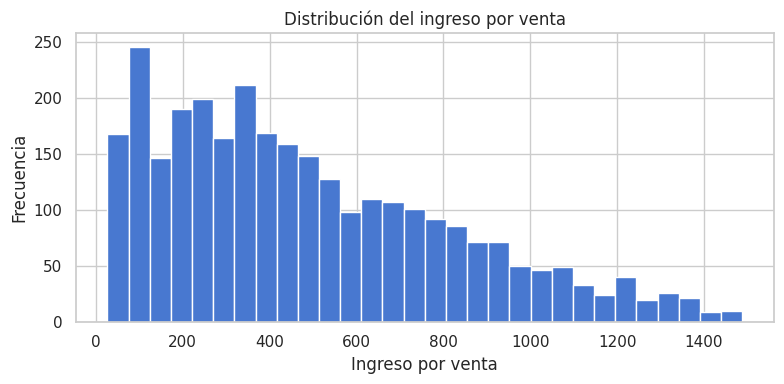



Ingresos totales por categoría:


,categoria,total
0,Electrodomésticos,505299.63
1,Electrónica,482577.8
2,Decoración,479216.09


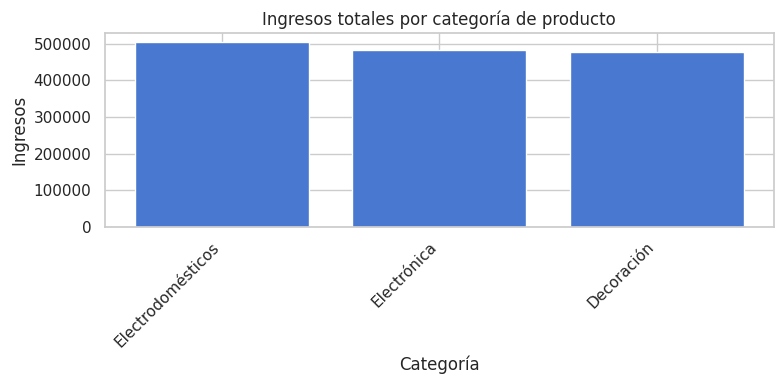



Evolución mensual de las ventas:


,Mes,total
0,2024-01,35813.42
1,2024-02,62419.5
2,2024-03,41350.64
3,2024-04,40841.22
4,2024-05,47038.02
5,2024-06,45911.05
6,2024-07,52894.39
7,2024-08,49463.15
8,2024-09,42206.39
9,2024-10,49905.12


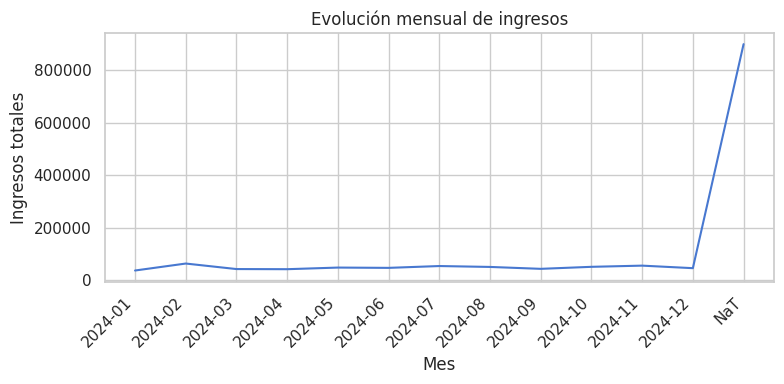



Top 10 productos por ingresos:


,producto,total
0,Lámpara de mesa,82276.38
1,Auriculares,74175.58
2,Microondas,72562.89
3,Cafetera,59607.31
4,Cuadro decorativo,54297.6
5,Smartphone,54132.44
6,Secadora,52115.45
7,Jarrón decorativo,51130.88
8,Batidora,50979.2
9,Rincón de plantas,50456.45


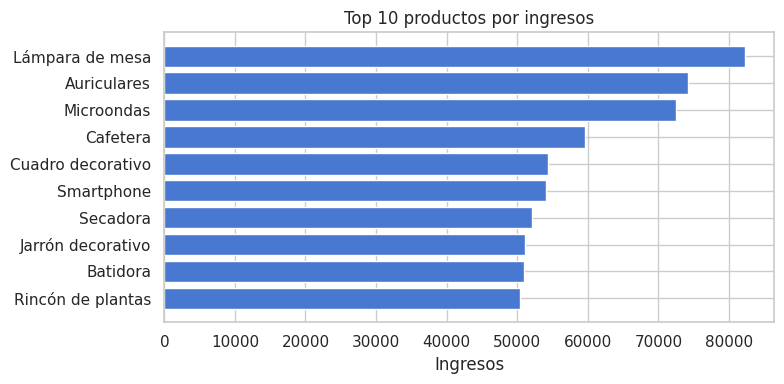

In [60]:
# ------------------------------------------------------------
# 2A. Distribución del total por venta
# ------------------------------------------------------------
# Permite observar la dispersión y detectar valores extremos.
# ------------------------------------------------------------

import matplotlib.pyplot as plt

plt.figure(figsize=(8,4))
plt.hist(df_ventas_limpio["total"], bins=30)
plt.title("Distribución del ingreso por venta")
plt.xlabel("Ingreso por venta")
plt.ylabel("Frecuencia")
plt.tight_layout()
plt.show()

# ------------------------------------------------------------
# 2B. Análisis de ventas por categoría
# ------------------------------------------------------------
# Categorías con mayor aporte a los ingresos.
# ------------------------------------------------------------

print("\n")

ventas_por_categoria = (
    df_ventas_limpio
    .groupby("categoria")["total"]
    .sum()
    .sort_values(ascending=False)
    .reset_index()
)

print("Ingresos totales por categoría:")
display(ventas_por_categoria)

print("\n")

plt.figure(figsize=(8,4))
plt.bar(ventas_por_categoria["categoria"], ventas_por_categoria["total"])
plt.title("Ingresos totales por categoría de producto")
plt.xlabel("Categoría")
plt.ylabel("Ingresos")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

# ------------------------------------------------------------
# 2C. Evolución temporal de las ventas
# ------------------------------------------------------------
# Se analiza la tendencia mensual de ingresos.
# ------------------------------------------------------------

print("\n")

ventas_mensuales = (
    df_ventas_limpio
    .assign(Mes=df_ventas_limpio["fecha_venta"].dt.to_period("M").astype(str))
    .groupby("Mes")["total"]
    .sum()
    .reset_index()
)

print("Evolución mensual de las ventas:")
display(ventas_mensuales)

print("\n")

plt.figure(figsize=(8,4))
plt.plot(ventas_mensuales["Mes"], ventas_mensuales["total"])
plt.title("Evolución mensual de ingresos")
plt.xlabel("Mes")
plt.ylabel("Ingresos totales")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

# ------------------------------------------------------------
# 2D. Productos con mayor ingreso total
# ------------------------------------------------------------
# Se identifica los productos que generan más ingresos.
# ------------------------------------------------------------

print("\n")

top_productos = (
    df_ventas_limpio
    .groupby("producto")["total"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
    .reset_index()
)

print("Top 10 productos por ingresos:")
display(top_productos)

print("\n")

plt.figure(figsize=(8,4))
plt.barh(top_productos["producto"], top_productos["total"])
plt.title("Top 10 productos por ingresos")
plt.xlabel("Ingresos")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# Etapa 4: Visualización de Datos
---

Objetivo:
- Representar gráficamente la evolución de las ventas en distintos períodos de tiempo.
- Utilizar visualizaciones estadísticas para comparar categorías y detectar patrones.
- Desarrollar visualizaciones interactivas que permitan explorar los datos dinámicamente.

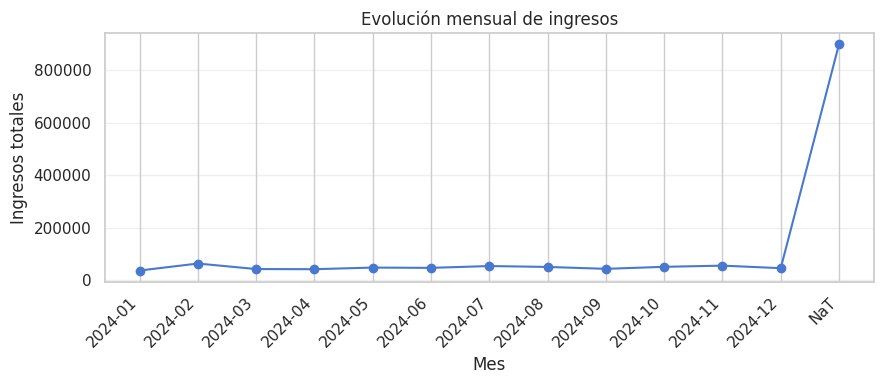

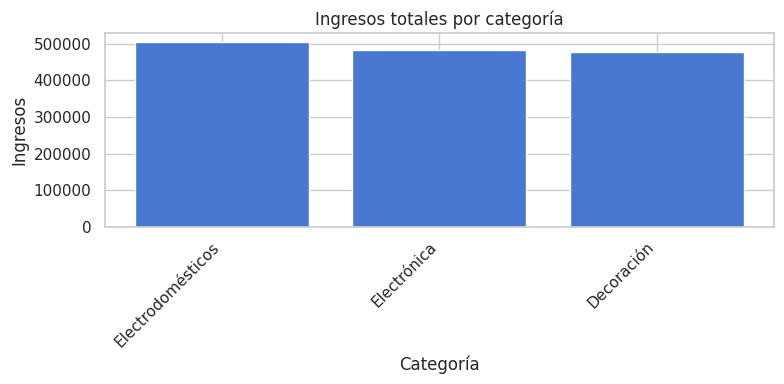

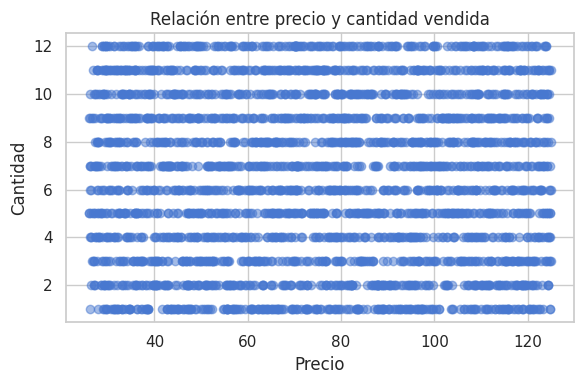

In [61]:
# ------------------------------------------------------------
# 1A. Visualización de la evolución temporal de las ventas
# ------------------------------------------------------------
# Gráfico de líneas para representar tendencias en el tiempo..
# ------------------------------------------------------------

ventas_mensuales = (
    df_ventas_limpio
    .assign(Mes=df_ventas_limpio["fecha_venta"].dt.to_period("M").astype(str))
    .groupby("Mes")["total"]
    .sum()
    .reset_index()
)

import matplotlib.pyplot as plt

plt.figure(figsize=(9,4))
plt.plot(ventas_mensuales["Mes"], ventas_mensuales["total"], marker="o")
plt.title("Evolución mensual de ingresos")
plt.xlabel("Mes")
plt.ylabel("Ingresos totales")
plt.xticks(rotation=45, ha="right")
plt.grid(True, axis="y", alpha=0.3)
plt.tight_layout()
plt.show()

# ------------------------------------------------------------
# 1B. Análisis de ventas por categoría
# ------------------------------------------------------------
# Gráfico para analizar el aporte relativo de cada categoría.
# ------------------------------------------------------------

print("\n")

ventas_por_categoria = (
    df_ventas_limpio
    .groupby("categoria")["total"]
    .sum()
    .sort_values(ascending=False)
    .reset_index()
)

plt.figure(figsize=(8,4))
plt.bar(ventas_por_categoria["categoria"], ventas_por_categoria["total"])
plt.title("Ingresos totales por categoría")
plt.xlabel("Categoría")
plt.ylabel("Ingresos")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

# ------------------------------------------------------------
# 1C. Relación entre precio y cantidad
# ------------------------------------------------------------
# Observar patrones de compra y posibles outliers..
# ------------------------------------------------------------

print("\n")

plt.figure(figsize=(6,4))
plt.scatter(df_ventas_limpio["precio"], df_ventas_limpio["cantidad"], alpha=0.5)
plt.title("Relación entre precio y cantidad vendida")
plt.xlabel("Precio")
plt.ylabel("Cantidad")
plt.tight_layout()
plt.show()

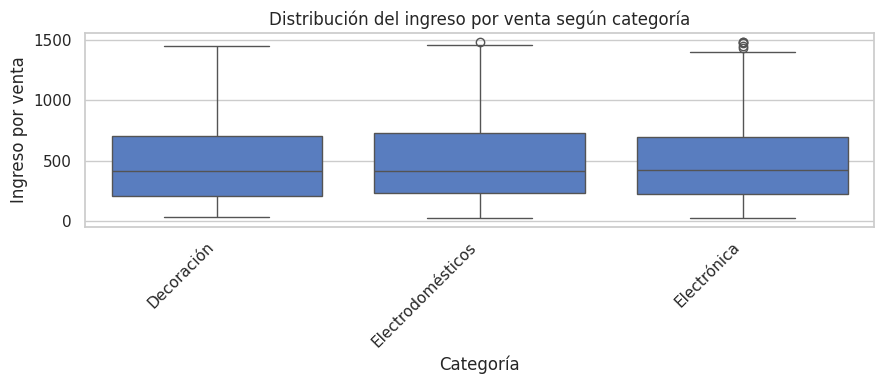

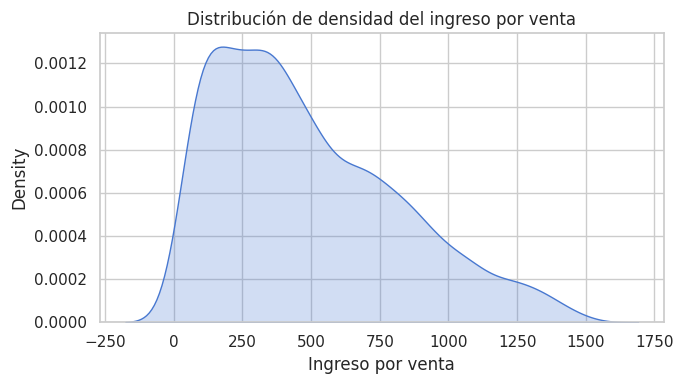

In [62]:
# ------------------------------------------------------------
# 2A. Visualización con Seaborn
# ------------------------------------------------------------

import seaborn as sns
sns.set(style="whitegrid", palette="muted")

# ------------------------------------------------------------
# 2B. Distribución de ingresos por categoría
# ------------------------------------------------------------
# Permite analizar dispersión, mediana y valores atípicos.
# ------------------------------------------------------------

plt.figure(figsize=(9,4))
sns.boxplot(
    data=df_ventas_limpio,
    x="categoria",
    y="total"
)
plt.title("Distribución del ingreso por venta según categoría")
plt.xlabel("Categoría")
plt.ylabel("Ingreso por venta")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

# ------------------------------------------------------------
# 2C. Densidad de ingresos
# ------------------------------------------------------------
# Distribución continua del ingreso por venta.
# ------------------------------------------------------------

print("\n")

plt.figure(figsize=(7,4))
sns.kdeplot(df_ventas_limpio["total"], fill=True)
plt.title("Distribución de densidad del ingreso por venta")
plt.xlabel("Ingreso por venta")
plt.tight_layout()
plt.show()

In [63]:
# ------------------------------------------------------------
# 3A. Visualización con Plotly
# ------------------------------------------------------------

!pip -q install plotly
import plotly.express as px

# ------------------------------------------------------------
# 3B. Gráfico interactivo de ventas mensuales
# ------------------------------------------------------------
# Permite explorar valores exactos y tendencias.
# ------------------------------------------------------------

fig_line = px.line(
    ventas_mensuales,
    x="Mes",
    y="total",
    title="Evolución mensual de ingresos",
    labels={"total": "Ingresos", "Mes": "Mes"}
)

fig_line.show()

# ------------------------------------------------------------
# 3C. Gráfico interactivo de ingresos por categoría
# ------------------------------------------------------------

fig_bar = px.bar(
    ventas_por_categoria,
    x="categoria",
    y="total",
    title="Ingresos por categoría",
    labels={"total": "Ingresos", "categoria": "Categoría"}
)

fig_bar.show()

# ------------------------------------------------------------
# 3D. Scatter interactivo
# ------------------------------------------------------------
# Se pueden explorar puntos individuales y detectar outliers.
# ------------------------------------------------------------

fig_scatter = px.scatter(
    df_ventas_limpio,
    x="precio",
    y="cantidad",
    color="categoria",
    title="Precio vs cantidad por categoría",
    labels={"precio": "Precio", "cantidad": "Cantidad"}
)

fig_scatter.show()